In [18]:
def conversion(x, b):
    if x == 0:
        return "0"
    else:
        result = ""
        while x > 0:
            rem = x % b
            x //= b
            result += str(rem)
        return result[::-1]

In [37]:
print(conversion(13,2))

1101


In [21]:
def reversing(x):
    x_rev = x[::-1]
    return "0." + x_rev


In [38]:
a = reversing(conversion(13,2))
print(a)

0.1011


In [43]:
def reconversion(x, b):
    result = 0
    for i in range(2, len(x)):
        result += int(x[i]) * b**(-(int(i)-1))
    return result

In [44]:
print(reconversion(a,2))

0.6875


In [45]:
def van_der_corput_sequence(n, b):
    result = []
    for i in range(n+1):
        result.append(reconversion(reversing(conversion(i, b)), b))
    return result

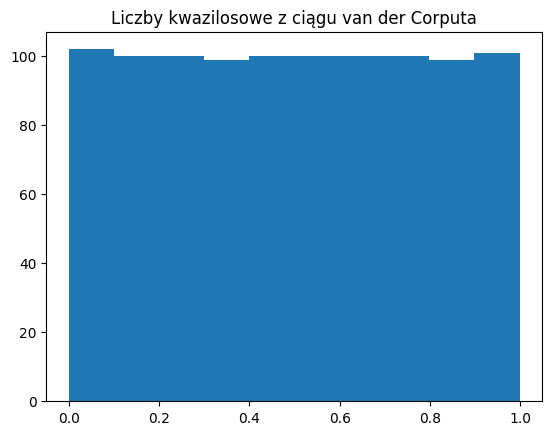

In [51]:
import matplotlib.pyplot as plt

plt.hist(van_der_corput_sequence(1000, 2))
plt.title("Liczby kwazilosowe z ciągu van der Corputa")
plt.show()

In [52]:
import math
def halton_sequence(n, b, k):
    if math.gcd(b,k) == 1:
        return [van_der_corput_sequence(n,b), van_der_corput_sequence(n,k)]
    else:
        raise ValueError("Bazy muszą być względnie pierwsze")

In [61]:
def pi_halton(n,b,k):
    xs, ys = halton_sequence(n,b,k)
    sum1 = 0
    for i in range(len(xs)):
        for j in range(len(ys)):
            if xs[i]**2 + ys[j]**2 < 1:
                sum1 += 1
    return 4 * sum1 / n**2

In [63]:
print(pi_halton(10000, 2, 3))

3.14399956
